# Goal 1: Investigate overall correlation between quantitative and qualitative metrics.

1.1: Discretize quantitative metrics in 1-5 score range and plot the histogram for each experiment to compare with qualitative results

**Experiments Scenarios**:
- "Passing"
- "Overtaking"
- "Crossing 1"
- "Crossing 2"
- "Advanced 1"
- "Advanced 2"
- "Advanced 3"
- "Advanced 4"

**Labels**:
- "Good"
- "Mid"
- "Bad"

**QM Metrics**
- [0] Time to Goal
- [1] Path length
- [2] Cumulative heading changes
- [3] Avg robot linear speed

- [4] Social Work 
- [5] Social Work (per second)
- [6] Average minimum distance to closest person
- [7] Proxemics: intimate space occupancy
- [8] Proxemics: personal space occupancy
- [9] Proxemics: social space occupancy
- [10] Proxemics: public space occupancy

**HM Metrics**
- [0] Unobtrusiveness
- [1] Friendliness
- [2] Smoothness
- [3] Avoidance Foresight

In [1]:
import yaml
import numpy as np
import os
from os.path import expanduser

In [2]:
home = '/workspaces/hunavsim_devcontainer/src/'
# Load config params for experiments
config = yaml.safe_load(open('params.yaml'))['social_metrics_match']

lab_data_path = home + config['data']['repo_dir'] + config['data']['lab_data_path']
survey_data_path = home + config['data']['repo_dir'] + config['data']['survey_data_path']
results_dir = home + config['data']['results_path']
print("lab data path: ", lab_data_path)
print("survey data path: ", survey_data_path)
print("results dir path: ", results_dir)

lab data path:  /workspaces/hunavsim_devcontainer/src//Social-Nav-Metrics-Matching/social_metrics_match/data_folder/validation_of_metrics_quantitative_and_lab_qualitative.ods
survey data path:  /workspaces/hunavsim_devcontainer/src//Social-Nav-Metrics-Matching/social_metrics_match/data_folder/qualitative_metrics_survey.xlsx
results dir path:  /workspaces/hunavsim_devcontainer/src//social_metrics_results


# Extract LAB data arrays

In [3]:
from utils.data_organization import organize_dict_lab_data, get_all_lab_data_arr, np_extract_exp_lab, np_single_lab_run

In [4]:
dict_lab_data = organize_dict_lab_data(lab_data_path)

# Extract the np arrays of a specific experiments identified by its keys
passing_good_QM_array, passing_good_HM_array = np_single_lab_run(dict_lab_data, experiment='Passing', label='Good')
print(f"Passing single run QM shape:{passing_good_QM_array.shape}, passing single run HM shape: {passing_good_HM_array.shape}")
print(f"Passing good QM: {passing_good_QM_array},\nPassing good HM: {passing_good_HM_array}") 

# Extract the np arrays of a lab scenario (all the 3 runs with different labels), dividing QM and HM
passing_QM_array, passing_HM_array = np_extract_exp_lab(dict_lab_data, experiment='Advanced 4', order=False, normalization="rescale")

print(f"passing QM shape:{passing_QM_array.shape}, passing HM shape: {passing_HM_array.shape}")
print(f"passing QM: {passing_QM_array},\npassing HM: {passing_HM_array}")

# Starting from the complete dataframe with lab data, Extract the np arrays of all lab scenarios dividing QM and HM
all_lab_QM_array, all_lab_HM_array = get_all_lab_data_arr(dict_lab_data, normalization="rescale")
print(f"All lab QM array: {all_lab_QM_array.shape}, All lab HM array: {all_lab_HM_array.shape}")
# print(f"All lab QM array: {all_lab_QM_array}, All lab HM array: {all_lab_HM_array}")

Passing single run QM shape:(11,), passing single run HM shape: (4,)
Passing good QM: [1.02326076e+01 4.55598068e+00 4.04913597e+00 1.99936767e-01
 1.99432749e+03 1.81716719e+02 2.37741413e+00 9.28961749e+00
 1.23341140e+01 7.28337237e+01 5.54254489e+00],
Passing good HM: [0.8 0.8 0.8 1. ]
passing QM shape:(11, 3), passing HM shape: (4, 3)
passing QM: [[1.         0.97133427 0.43950695]
 [0.74305932 1.         0.42882107]
 [0.19986196 1.         0.11929873]
 [0.85855513 0.83319477 1.        ]
 [0.81817684 1.         0.62951608]
 [0.74268802 0.72067214 1.        ]
 [1.         0.93675704 0.75519201]
 [1.         0.72535526 0.84719153]
 [0.73486025 1.         0.72468322]
 [0.94094112 1.         0.86321904]
 [0.98857658 1.         0.96529175]],
passing HM: [[0.  0.  0. ]
 [1.  0.8 0.6]
 [1.  0.8 0.4]
 [0.8 0.8 0.6]]
All lab QM array: (24, 11), All lab HM array: (24, 4)


# Extract SURVEY data arrays

In [5]:
from utils.data_organization  import organize_dict_survey, weighted_avg_survey_data, get_robotics_knowledge, datacube_qual_survey_data

In [6]:
dict_survey_data = organize_dict_survey(survey_data_path)
robot_knowledge_array = get_robotics_knowledge(survey_data_path)

# To extract np arrays of all the survey data
survey_datacube = datacube_qual_survey_data(dict_survey_data, normalize=True)

# To directly extract the average and std: If Weighted average set w_avg=True (use robotics background knowledge as weights)
weighted_survey_array_avg, weighted_survey_array_std = weighted_avg_survey_data(dict_survey_data, robot_knowledge_array, w_avg=True)
print(f"survey weighted avg shape: {weighted_survey_array_avg.shape},\nsurvey weighted std shape:  {weighted_survey_array_std.shape}") 

survey weighted avg shape: (24, 4),
survey weighted std shape:  (24, 4)


# Plot Data Results

In [7]:
from utils.plot_utils import plot_avg_std_survey_metrics, plot_avg_std_all_metrics

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [8]:
from itertools import combinations
QM_means = np.mean(all_lab_QM_array, axis=1)
# Check and fill the last three rows, first column with mean of other columns
for i in range(-3, 0):  # Last 3 rows
    if weighted_survey_array_avg[i, 0] == 0:
        weighted_survey_array_avg[i, 0] = np.mean(weighted_survey_array_avg[i, 1:])
HM_means = np.mean(weighted_survey_array_avg, axis=1)
HM_lab_means = np.mean(all_lab_HM_array, axis=1)
super_HM_means = (HM_means + HM_lab_means)/2
results = []
reduced_all_lab_QM_array = all_lab_QM_array[:, [0,3,6,7,8]]  # exclude the first column (time)
n_features = reduced_all_lab_QM_array.shape[1]  # total number of quantitative metrics

for r in range(1, n_features + 1):
    for cols in combinations(range(n_features), r):
        subset = reduced_all_lab_QM_array[:, list(cols)]
        QM_means_subset = np.mean(subset, axis=1)
        sq_diff = (HM_means - QM_means_subset) ** 2
        results.append({
            'metrics': cols,
            'squared_diff': sq_diff,
            'mean_squared_diff': np.mean(sq_diff),
            'sum_of_deviations': np.sum(sq_diff)  # keep key for existing sorting line
        })

results = sorted(results, key=lambda item: item['sum_of_deviations'], reverse=False)
# Print sorted results by sum_of_deviations in descending order
for res in results:
    print("QM metrics columns:", res['metrics'], "sum_of_deviations:", res['sum_of_deviations'])


QM metrics columns: (0, 1, 2) sum_of_deviations: 1.1496290861939555
QM metrics columns: (0, 1, 2, 3) sum_of_deviations: 1.1717161497479422
QM metrics columns: (0, 1, 3) sum_of_deviations: 1.2088041735541326
QM metrics columns: (0, 1, 2, 3, 4) sum_of_deviations: 1.2418046297779786
QM metrics columns: (0, 2) sum_of_deviations: 1.269047554007816
QM metrics columns: (0, 1, 2, 4) sum_of_deviations: 1.2782048337154537
QM metrics columns: (0, 2, 3) sum_of_deviations: 1.3102438597510901
QM metrics columns: (0, 1, 3, 4) sum_of_deviations: 1.3237267210515458
QM metrics columns: (0, 2, 3, 4) sum_of_deviations: 1.3237849777289146
QM metrics columns: (0, 2, 4) sum_of_deviations: 1.363501481905929
QM metrics columns: (0, 3) sum_of_deviations: 1.400448430297406
QM metrics columns: (0, 1) sum_of_deviations: 1.4255300686536498
QM metrics columns: (1, 2, 3, 4) sum_of_deviations: 1.4314194171151542
QM metrics columns: (0, 3, 4) sum_of_deviations: 1.4436545837163994
QM metrics columns: (1, 2, 3) sum_of_de

## TO TRY: [3,5,6,7,8]
## [2,7,8,9,10]
## combinations of [0,3,6,7,8]
## order : [0,2,3,5,6,7,8]

In [18]:
weight_6 = [0.54,0.55,0.37,0.41]
weight_3 = [0.43,0.,0.,0.]
weight_2 = [0.,0.,0.34,0.]
weight_7 = [0.5,0.54,0.35,0.45]
weight_9 = [0.47,0.4,0.,0.41]
weight_0 = [0.44,0.,0.44,0.]

#weight = np.array([weight_0, weight_6, weight_7, weight_9])
# weight = np.sum(weight, axis=1)
# print("Weights for each QM metric: ", weight.shape)
# print("factor", np.sum(weight))
optimal_QM_metrics = all_lab_QM_array[:, [2,7,8,9,10]]  


In [19]:
#optimal_QM_metrics = all_lab_QM_array[:,[0,2,4,6,7,9]] # good combination
#optimal_QM_metrics = all_lab_QM_array[:,[0,3,6,7]] ## decent
#optimal_QM_metrics = all_lab_QM_array[:,[0,3,6,7,8]] # not bad

#optimal_QM_means = np.average(optimal_QM_metrics, axis=1,weights=weight)
survey_means = np.mean(weighted_survey_array_avg, axis=1)
#new_array = optimal_QM_means/survey_means
#scaling_factor = np.mean(new_array)
#print("Optimal QM metrics shape:", new_array)
#print("scaling_factor:", scaling_factor)

#comparison = np.array([survey_means, optimal_QM_means/scaling_factor])


##plot_avg_std_survey_metrics(weighted_survey_array_avg, weighted_survey_array_std)
#plot_avg_std_all_metrics(all_lab_QM_array, optimal_QM_metrics, weight, weighted_survey_array_avg, weighted_survey_array_std)

Unit weight: [1. 1. 1. 1. 1.]


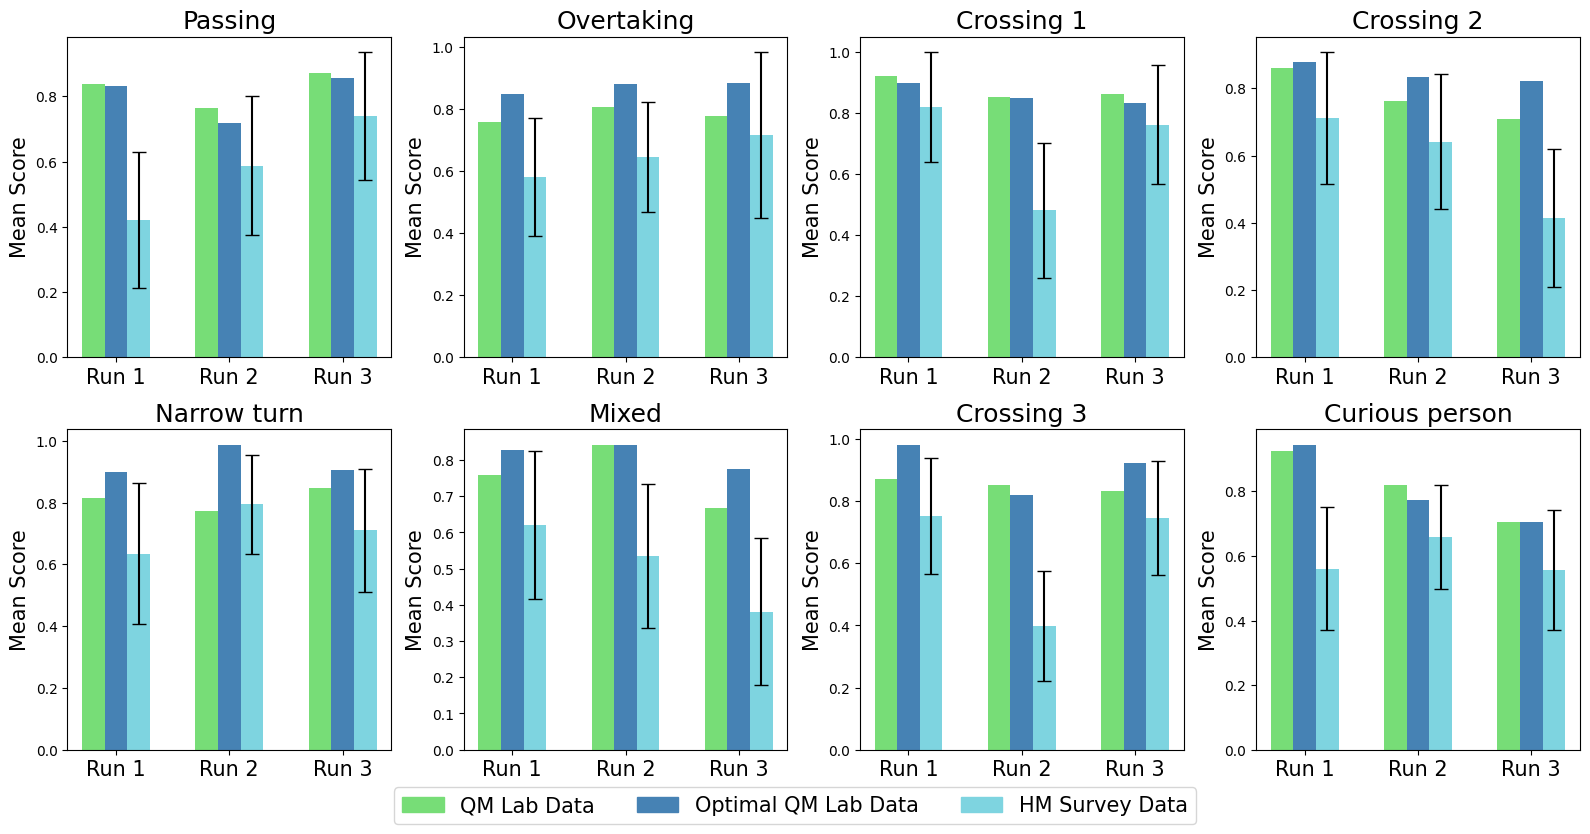

In [21]:
from utils.plot_utils import plot_avg_std_all_metrics_subplot
unit_weight = np.ones_like(optimal_QM_metrics[1])
print("Unit weight:", unit_weight)
#plot_avg_std_all_metrics_subplot(all_lab_QM_array, optimal_QM_metrics, weight, weighted_survey_array_avg, weighted_survey_array_std)
plot_avg_std_all_metrics_subplot(all_lab_QM_array, optimal_QM_metrics, unit_weight, weighted_survey_array_avg, weighted_survey_array_std)    